Getting weird results from my tabulated SHAM/UM emus. Trying to understand them, and one way I can is by making a TAB HOD emu. 

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from os import path
from pearce.mocks.kittens import TrainingBox
from pearce.mocks.customHODModels import TabulatedCens, TabulatedSats

In [3]:
um_dir = '/u/ki/swmclau2/des/aemulus_mock_catalogs/'
cen_hod = np.load(path.join(um_dir,'sham_cen_hod.npy'))
sat_hod = np.load(path.join(um_dir,'sham_sat_hod.npy'))
tot_hod = np.load(path.join(um_dir,'sham_hod.npy'))

In [4]:
haloprop_bins = np.logspace(10,16, 60)
mbc = (haloprop_bins[1:]+haloprop_bins[:-1])/2.0

In [5]:
np.save(path.join(um_dir, 'prim_haloprop_vals.npy'), mbc)

In [33]:
um_dir

'/u/ki/swmclau2/des/aemulus_mock_catalogs/'

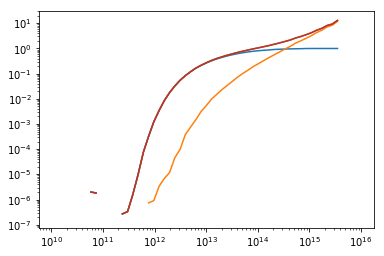

In [14]:
plt.plot(mbc, cen_hod)
plt.plot(mbc, sat_hod)
plt.plot(mbc, cen_hod+sat_hod)
plt.plot(mbc, tot_hod)
plt.loglog();

In [21]:
r_bins = np.logspace(-1, 1.6, 19)
rbc = (r_bins[1:]+r_bins[:-1])/2.0

In [36]:
def compute_wp(boxno):
    cat = TrainingBox(boxno)
    cat.load(1.0, HOD=(TabulatedCens,TabulatedSats),
         hod_kwargs = {'prim_haloprop_vals': haloprop_bins[:-1],
                       #mass_bin_centers,
                    #'sec_haloprop_key': sec_haloprop_key, #'halo_%s'%(mag_type),
                       'cen_hod_vals':cen_hod,
                        'sat_hod_vals':sat_hod})
    cat.populate()
    return cat.calc_wp(r_bins).squeeze()

In [37]:
Y = np.zeros((40, 18))

In [38]:
for i in xrange(40):
    print i 
    Y[i] = compute_wp(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


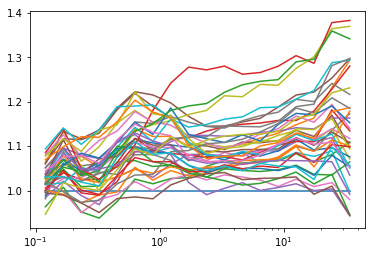

In [39]:
plt.plot(rbc, (Y/Y[0]).T )
plt.xscale('log');